In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Logistic Regression

## Loading the datasets

In [9]:
# Load the datasets
X_train_pca = pd.read_csv('X_train_pca.csv')
y_train = pd.read_csv('y_train.csv')
X_test_pca = pd.read_csv('X_test_pca.csv')
y_test = pd.read_csv('y_test.csv')

y_train = y_train.squeeze()
y_test = y_test.squeeze()

X_train_pca head:
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -2.562846 -2.244455  1.553104 -0.445555  0.741239 -1.782680  0.351698   
1 -0.768175  2.122520 -1.164018 -0.994676 -1.546225  0.634103 -1.326772   
2 -2.598304 -1.899499 -0.985666  0.257364  0.403501  0.313866  2.521424   
3  2.930249  0.692801 -0.944670  0.204417  0.024976 -1.516570 -0.075729   
4 -2.153347 -1.489487  0.062592  1.040510  1.302438 -0.366933  0.815593   

      PCA_8  
0 -0.284655  
1 -0.036194  
2 -0.632936  
3  0.625147  
4 -0.580401  

Y_train head:
0    0
1    1
2    0
3    1
4    0
Name: loan_status, dtype: int64

Statistical summary of X_train_pca:
              PCA_1         PCA_2         PCA_3         PCA_4         PCA_5  \
count  3.415000e+03  3.415000e+03  3.415000e+03  3.415000e+03  3.415000e+03   
mean   2.184685e-17  4.161304e-18  4.161304e-18  2.496783e-17  4.863525e-17   
std    1.867224e+00  1.363974e+00  1.353191e+00  1.015037e+00  1.003903e+00   
min   -3.442

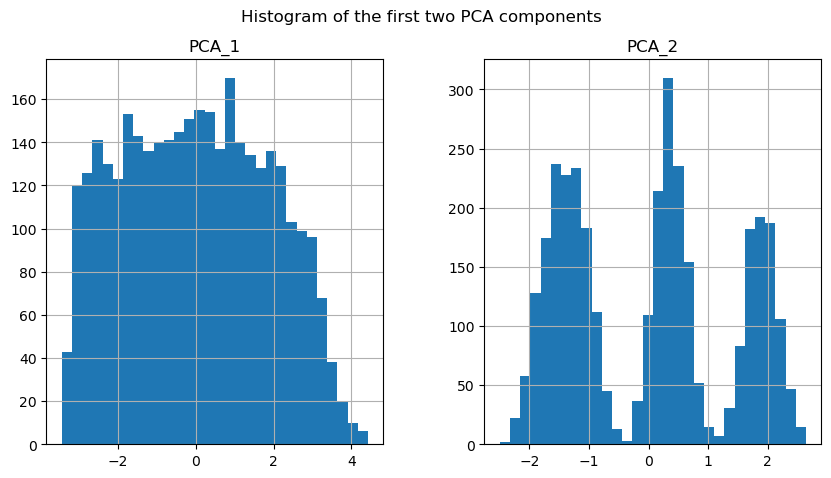

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,-2.562846,-2.244455,1.553104,-0.445555,0.741239,-1.782680,0.351698,-0.284655
1,-0.768175,2.122520,-1.164018,-0.994676,-1.546225,0.634103,-1.326772,-0.036194
2,-2.598304,-1.899499,-0.985666,0.257364,0.403501,0.313866,2.521424,-0.632936
3,2.930249,0.692801,-0.944670,0.204417,0.024976,-1.516570,-0.075729,0.625147
4,-2.153347,-1.489487,0.062592,1.040510,1.302438,-0.366933,0.815593,-0.580401


In [35]:
# Display the first few rows of each dataset
print("X_train_pca head:")
print(X_train_pca.head())
print("\nY_train head:")
print(y_train.head())

# Statistical summary of the training features
print("\nStatistical summary of X_train_pca:")
print(X_train_pca.describe())

# Checking for missing values
print("\nMissing values in each column of X_train_pca:")
print(X_train_pca.isnull().sum())

# Histogram of the first two PCA components
X_train_pca.iloc[:, :2].hist(bins=30, figsize=(10, 5))
plt.suptitle("Histogram of the first two PCA components")
plt.show()
X_train_pca.head()

### Description 

1. **Head of `X_train_pca`**:
   - The output showed the first few rows of the `X_train_pca` dataset, which consists of principal component analysis (PCA) features. These features are transformations of the original variables into a set of linearly uncorrelated variables, structured to capture the most variance or information possible. The displayed rows provided insight into how the data dimensions were reduced and transformed, facilitating more efficient learning by the logistic regression model.

2. **Head of `y_train`**:
   - The first few entries of the `y_train` dataset were displayed, which represent whether a loan was approved (1) or not (0). This brief view helps to understand the response variable distribution that the model aims to predict, indicating a balance or imbalance in the dataset regarding loan approvals.

3. **Statistical Summary of `X_train_pca`**:
   - A comprehensive statistical summary of the `X_train_pca` data was provided, which included metrics like the mean, standard deviation, min, max, and quartiles for each PCA component. This summary is essential to get an understanding of the distribution and scale of the PCA-transformed features, ensuring that the inputs to the model are well-understood and appropriately scaled.

4. **Missing Values Check**:
   - An essential step before model training, the output confirmed that there are no missing values in any column of the `X_train_pca`, indicating that the dataset is clean and ready for training without the need for additional preprocessing to handle missing data.

5. **Histogram of the First Two PCA Components**:
   - Histograms for the first two PCA components were visualized to understand their distribution better. This visualization helps in seeing how the data is structured in these principal components, possibly indicating how well-separated the approved and non-approved loans might be in these reduced dimensions.

Each of these steps provided a deeper understanding of the data's structure and readiness for modeling, ensuring that the logistic regression model operates on well-prepared input features. 

## Building of Logistic Regression model

using datasets with PCA implementation

Test Set Results:
Accuracy of the Logistic Regression model: 95.20%

Confusion Matrix:
             Predicted: No  Predicted: Yes
Actual: No             308              17
Actual: Yes             24             505

Classification Report:
              precision    recall  f1-score   support

           0     0.9277    0.9477    0.9376       325
           1     0.9674    0.9546    0.9610       529

    accuracy                         0.9520       854
   macro avg     0.9476    0.9512    0.9493       854
weighted avg     0.9523    0.9520    0.9521       854


Training Set Results:
Accuracy of the Logistic Regression model: 95.61%

Confusion Matrix:
             Predicted: No  Predicted: Yes
Actual: No            1227              61
Actual: Yes             89            2038

Classification Report:
              precision    recall  f1-score   support

           0     0.9324    0.9526    0.9424      1288
           1     0.9709    0.9582    0.9645      2127

    accuracy            

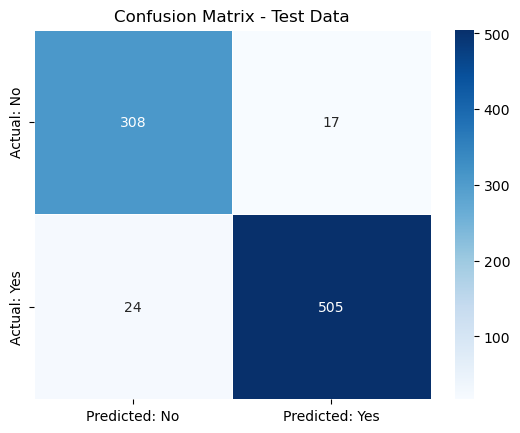

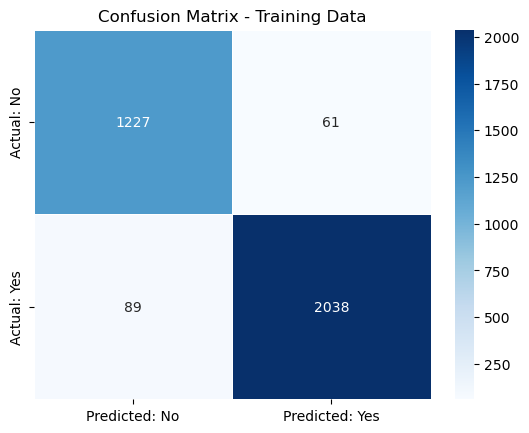

In [43]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=69)

# Train the logistic regression model on the PCA-transformed training data
logistic_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_test = logistic_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test, digits=4)

# Predict on the training set
y_pred_train = logistic_model.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train, digits=4)

# Print Test Set Results
print("Test Set Results:")
print("Accuracy of the Logistic Regression model:", "{:.2%}".format(accuracy_test))
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_test, columns=['Predicted: No', 'Predicted: Yes'], index=['Actual: No', 'Actual: Yes']))
print("\nClassification Report:")
print(class_report_test)

# Print Training Set Results
print("\nTraining Set Results:")
print("Accuracy of the Logistic Regression model:", "{:.2%}".format(accuracy_train))
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_train, columns=['Predicted: No', 'Predicted: Yes'], index=['Actual: No', 'Actual: Yes']))
print("\nClassification Report:")
print(class_report_train)

# Visualization for Test Confusion Matrix
sns.heatmap(conf_matrix_test, annot=True, fmt="d", linewidths=.5, cmap='Blues', 
            xticklabels=['Predicted: No', 'Predicted: Yes'], 
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix - Test Data')
plt.show()

# Visualization for Training Confusion Matrix
sns.heatmap(conf_matrix_train, annot=True, fmt="d", linewidths=.5, cmap='Blues', 
            xticklabels=['Predicted: No', 'Predicted: Yes'], 
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix - Training Data')
plt.show()


### Test Set Results
- **Accuracy**: 95.20%
  - This indicates that the logistic regression model correctly predicts the outcome 95.20% of the time on the test dataset, which represents unseen data. This is a strong performance, suggesting good generalizability.
  
- **Confusion Matrix**:
  - **True Negatives (Actual No, Predicted No)**: 308
  - **False Positives (Actual No, Predicted Yes)**: 17
  - **False Negatives (Actual Yes, Predicted No)**: 24
  - **True Positives (Actual Yes, Predicted Yes)**: 505
  - The model is more effective in predicting the positive class (Yes), which could indicate that it's slightly better at recognizing characteristics of this class.

- **Classification Report**:
  - **Precision for Class 0 (No)**: 92.77%
  - **Recall for Class 0 (No)**: 94.77%
  - **F1-Score for Class 0 (No)**: 93.76%
  - **Precision for Class 1 (Yes)**: 96.74%
  - **Recall for Class 1 (Yes)**: 95.46%
  - **F1-Score for Class 1 (Yes)**: 96.10%
  - The classification report confirms the model's strong performance, particularly for the positive class, with high precision and recall across both classes.

### Training Set Results
- **Accuracy**: 95.61%
  - The accuracy on the training set is slightly higher than on the test set, which is typical since the model is trained on this data. The closeness of the training and testing accuracy suggests **minimal overfitting.**

- **Confusion Matrix**:
  - **True Negatives (Actual No, Predicted No)**: 1227
  - **False Positives (Actual No, Predicted Yes)**: 61
  - **False Negatives (Actual Yes, Predicted No)**: 89
  - **True Positives (Actual Yes, Predicted Yes)**: 2038
  - The confusion matrix shows a similar pattern to the test set, with relatively low false positives and false negatives, indicating consistent model behavior across different datasets.

- **Classification Report**:
  - **Precision for Class 0 (No)**: 93.24%
  - **Recall for Class 0 (No)**: 95.26%
  - **F1-Score for Class 0 (No)**: 94.24%
  - **Precision for Class 1 (Yes)**: 97.09%
  - **Recall for Class 1 (Yes)**: 95.82%
  - **F1-Score for Class 1 (Yes)**: 96.45%
  - The classification metrics for the training set are very similar to those for the test set, which is a positive indication of the model's reliability and stability.

### Conclusion
The logistic regression model demonstrates excellent performance with both high accuracy and balanced precision-recall scores on both the training and testing datasets. The model shows minimal signs of overfitting, which is further supported by the similarity in performance metrics between the training and testing sets. This suggests that the model is well-tuned and robust for the task at hand.


# Further Evaluation of the Logistic Regression model


# K Fold validation technique

K-fold cross-validation assesses the model's generalization ability by using different subsets of the data for training and testing, ensuring robustness and reducing bias in performance estimates.

In [45]:
X_train_pca = pd.read_csv('X_train_pca.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  #compatabilty

model = Pipeline([
    ('scaler', StandardScaler()), 
    ('logistic', LogisticRegression(random_state=69))
])

# Define the k-fold cross-validation method
kf = KFold(n_splits=10, shuffle=True, random_state=41)

# Perform cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=kf, scoring='accuracy')  # Change scoring to 'roc_auc', 'f1', etc., if needed

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", scores)
print("\n")
# Print the average accuracy score
print("Average cross-validation score:", scores.mean())




Accuracy scores for each fold:
 [0.93859649 0.95321637 0.93859649 0.94736842 0.9619883  0.95601173
 0.95601173 0.96480938 0.96774194 0.95601173]


Average cross-validation score: 0.9540352592135275


The results from the 10-fold cross-validation on the logistic regression model show very consistent and high accuracy across all folds, indicating that the model performs well with the PCA-transformed data. Here's a detailed look at the results:

- **Accuracy Scores for Each Fold**:
  - Fold 1: 93.86%
  - Fold 2: 95.32%
  - Fold 3: 93.86%
  - Fold 4: 94.74%
  - Fold 5: 96.20%
  - Fold 6: 95.60%
  - Fold 7: 95.60%
  - Fold 8: 96.48%
  - Fold 9: 96.77%
  - Fold 10: 95.60%

- **Average Cross-Validation Score**: 95.40%

These results suggest that the model is very stable and generalizes well to new data, as indicated by the **low variance in accuracy scores** across different splits of the data. The high average accuracy score of approximately 95.40% also indicates that the model is effectively capturing the patterns in the data, which are relevant for prediction.

Given these results, the logistic regression model seems to be **performing quite effectively.**

# ROC curve and AUC

 The ROC curve visualizes the trade-off between sensitivity (true positive rate) and specificity (false positive rate) at various thresholds. The area under the curve (AUC) provides a single number summarizing performance across all thresholds.

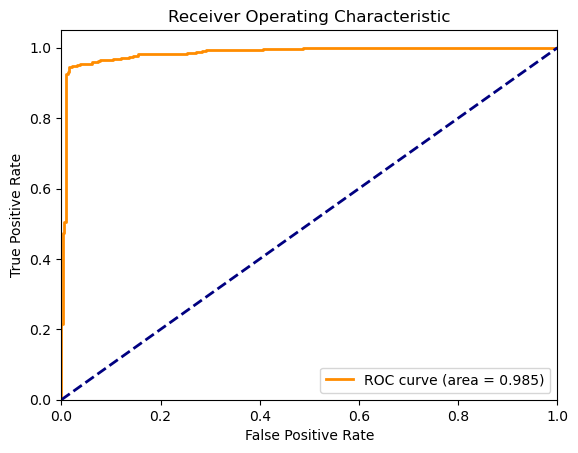

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- **ROC Curve**: The curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
  
- **AUC Score**: The area under the ROC curve (AUC) is approximately **0.985**. This value is very close to 1, which indicates an excellent level of model performance. A higher AUC value suggests that the model has a high ability to discriminate between positive and negative classes effectively.

- **Interpretation**: The high AUC score implies that the logistic regression model does an excellent job in distinguishing between the two classes. The curve being closer to the top-left corner of the plot signifies that the model can achieve a high true positive rate while maintaining a low false positive rate.

This ROC curve and its high AUC score confirm that the model is performing extremely well on the test data, making it a reliable tool for predicting outcomes based on our PCA-transformed features.